In [277]:
import cartopy
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from rasterio.warp import transform

In [297]:
xi, yi = [204, 1097], [219, 1269]

da = xr.open_rasterio('https://noaa-nbm-pds.s3.amazonaws.com/blendv4.0/conus/' +
                      '2020/10/08/1200/probqpf24gt001/blendv4.0_conus_probqpf24gt001' + 
                      '_2020-10-08T12%3A00_2020-10-09T12%3A00.tif',
                     ).isel(band=0, x=slice(xi[0], xi[1]), y=slice(yi[0], yi[1])).drop('band')

# Compute the lon/lat coordinates with rasterio.warp.transform
ny, nx = len(da['y']), len(da['x'])
x, y = np.meshgrid(da['x'], da['y'])

# Rasterio works with 1D arrays
lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
lon = np.asarray(lon).reshape((ny, nx))
lat = np.asarray(lat).reshape((ny, nx))
da.coords['lon'] = (('y', 'x'), lon)
da.coords['lat'] = (('y', 'x'), lat)

da.load()

<xarray.DataArray (y: 1050, x: 893)>
array([[87, 87, 87, ..., 77, 75, 72],
       [87, 87, 87, ..., 81, 77, 74],
       [87, 88, 88, ..., 84, 80, 76],
       ...,
       [ 2,  2,  2, ...,  0,  0,  0],
       [ 2,  2,  2, ...,  0,  1,  1],
       [ 2,  2,  2, ...,  0,  1,  1]], dtype=int16)
Coordinates:
  * y        (y) float64 3.233e+06 3.231e+06 3.228e+06 ... 5.718e+05 5.692e+05
  * x        (x) float64 -2.753e+06 -2.751e+06 ... -4.902e+05 -4.876e+05
    lon      (y, x) float64 -130.0 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0
    lat      (y, x) float64 49.98 49.99 49.99 50.0 ... 30.03 30.03 30.03 30.03
Attributes:
    transform:      (2539.703, 0.0, -3272421.457337171, 0.0, -2539.703, 37908...
    crs:            +proj=lcc +lat_0=25 +lon_0=265 +lat_1=25 +lat_2=25 +x_0=0...
    res:            (2539.703, 2539.703)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('0[-] SFC="Ground or water surface"',)
    AREA_OR_POINT:  Area

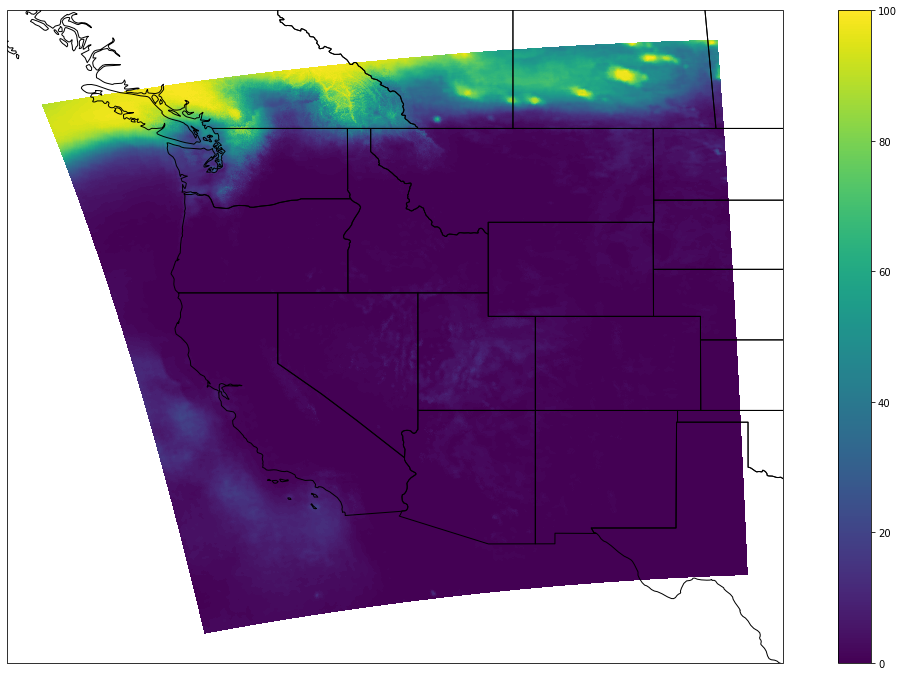

In [298]:
fig = plt.figure(figsize=(20, 12))
ax = plt.subplot(projection=ccrs.PlateCarree())
da.plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.STATES)